In [3]:
import pandas as pd
import glob

# Find all CSV files with suffix 'test'
csv_files = glob.glob('/home/ihossain/ISMAIL/SSL-malware/results_ours/*[0-9]_test.csv')

# Read each CSV file into a DataFrame and store them in a list
dataframes = [pd.read_csv(file) for file in csv_files]

# Optionally, you can concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)


In [6]:
combined_df.head()

,date\tTPR\tTNR\tFPR\tFNR\tACC\tPREC\tF1
0,2013-07\t0.8300\t0.9947\t0.0053\t0.1700\t0.978...
1,2013-08\t0.7727\t0.9923\t0.0077\t0.2273\t0.970...
2,2013-09\t0.7740\t0.9931\t0.0069\t0.2260\t0.971...
3,2013-10\t0.7194\t0.9924\t0.0076\t0.2806\t0.965...
4,2013-11\t0.7051\t0.9951\t0.0049\t0.2949\t0.966...


In [1]:
import pandas as pd
import glob
combined_df = pd.read_csv("/home/ihossain/ISMAIL/SSL-malware/results_ours/ssl-loss/gen_apigraph_03.18-22.56.10_100_cosine_1000_test.csv")

In [2]:
# Split the single column into multiple columns using tab as the delimiter
combined_df = combined_df['date\tTPR\tTNR\tFPR\tFNR\tACC\tPREC\tF1'].str.split('\t', expand=True)

# Rename the columns
combined_df.columns = ['date', 'TPR', 'TNR', 'FPR', 'FNR', 'ACC', 'PREC', 'F1']


In [3]:
# Display the updated DataFrame
combined_df.head(10)

,date,TPR,TNR,FPR,FNR,ACC,PREC,F1
0,2013-08,0.7066,0.9936,0.0064,0.2934,0.9651,0.9243,0.8009
1,2013-09,0.7340,0.9924,0.0076,0.2660,0.9665,0.9152,0.8147
2,2013-10,0.6874,0.9915,0.0085,0.3126,0.9611,0.9003,0.7795
3,2013-11,0.7273,0.9922,0.0078,0.2727,0.9658,0.9114,0.8090
4,2013-12,0.6333,0.9944,0.0056,0.3667,0.9583,0.9267,0.7524
5,2014-01,0.6795,0.9875,0.0125,0.3205,0.9571,0.8568,0.7579
6,2014-02,0.6404,0.9909,0.0091,0.3596,0.9560,0.8855,0.7433
7,2014-03,0.6781,0.9782,0.0218,0.3219,0.9484,0.7737,0.7228
8,2014-04,0.6773,0.9887,0.0113,0.3227,0.9578,0.8688,0.7612
9,2014-05,0.6539,0.9770,0.0230,0.3461,0.9448,0.7593,0.7027


In [4]:
# Convert columns to numeric, except for the date column
for col in combined_df.columns[1:]:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Calculate the average of the specified columns
average_values = combined_df[['TPR', 'TNR', 'FPR', 'FNR', 'ACC', 'PREC', 'F1']].mean()


In [5]:
# Print the average values
print("Average:", average_values)

Average: TPR     0.409068
TNR     0.989798
FPR     0.010202
FNR     0.590932
ACC     0.935598
PREC    0.773480
F1      0.514209
dtype: float64


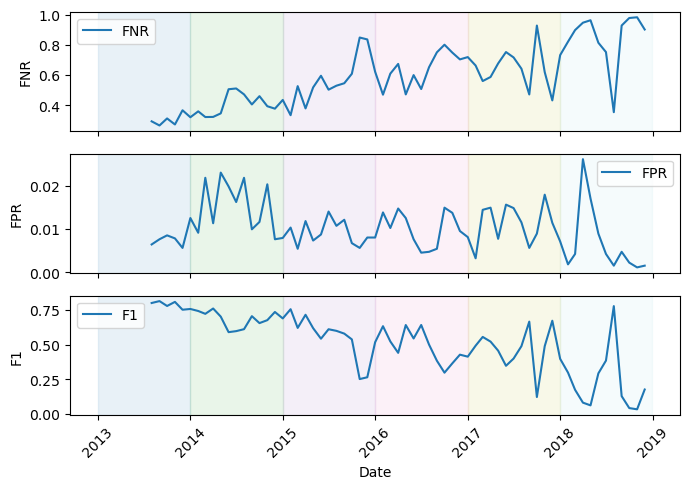

In [6]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm

# Convert columns to numeric, except for the date column
for col in combined_df.columns[1:]:
    combined_df[col] = pd.to_numeric(combined_df[col])

# Convert the 'date' column to datetime
combined_df['date'] = pd.to_datetime(combined_df['date'], format='%Y-%m')

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Columns to plot
columns_to_plot = ['FNR', 'FPR', 'F1']

# Get unique years and create a color map
years = combined_df['date'].dt.year.unique()
colors = cm.get_cmap('tab20', len(years))

# Plot each specified column against the date column
for i, col in enumerate(columns_to_plot):
    axs[i].plot(combined_df['date'], combined_df[col], label=col)
    axs[i].set_ylabel(col)
    axs[i].legend()

    # Highlight the portion from the first month to the last month of each year with different colors
    for j, year in enumerate(years):
        start_date = f'{year}-01-01'
        end_date = f'{year}-12-31'
        axs[i].axvspan(start_date, end_date, color=colors(j), alpha=0.1)

# Set the x-axis label for the last subplot
axs[-1].set_xlabel('Date')

# Format the x-axis to show only the years
axs[-1].xaxis.set_major_locator(mdates.YearLocator())
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [3]:
# pip install sentence_transformers

In [1]:
# import pandas as pd
# from sentence_transformers import SentenceTransformer, util

# # Load a sentence transformer model for semantic similarity
# model = SentenceTransformer('all-MiniLM-L6-v2')

# # Sample compliance data
# extracted_rules = [
#     "NRC 1.206 requires annual cybersecurity risk assessments.",
#     "IAEA requires safety drills every year.",
#     "NRC regulations require daily radiation exposure monitoring.",
#     "Emergency shutdown tests must be conducted quarterly."
# ]

# llm_responses = [
#     "Cybersecurity logs should be updated annually as per NRC guidelines.",
#     "IAEA recommends safety drills at least once per year.",
#     "NRC regulations require daily radiation exposure monitoring.",
#     "Emergency shutdown tests should be conducted quarterly."
# ]

# # Compute similarity scores between extracted rules and LLM responses
# similarity_scores = [
#     round(util.pytorch_cos_sim(model.encode(extracted_rules[i]), model.encode(llm_responses[i])).item() * 100, 1)
#     for i in range(len(extracted_rules))
# ]

# # Create DataFrame for similarity score table
# df_similarity = pd.DataFrame({
#     "Extracted Rule": extracted_rules,
#     "LLM Response": llm_responses,
#     "Similarity Score (%)": similarity_scores
# })

# # Generate LaTeX table for similarity score report
# latex_similarity = df_similarity.to_latex(index=False, caption="Updated Compliance Report with LLM Similarity Scores", label="tab:updated_compliance_similarity")

# # Save LaTeX content to a file
# with open("compliance_similarity_report.tex", "w") as f:
#     f.write(latex_similarity)

# # Print LaTeX table output
# print(latex_similarity)


In [ ]:
# !pip install numpy matplotlib

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
 
# Assuming you have loaded these already
X = np.load("/home/ihossain/ISMAIL/Datasets/data/gen_apigraph_drebin/2012-01to2012-12_selected.npz")['X_train']
y = np.load("/home/ihossain/ISMAIL/Datasets/data/gen_apigraph_drebin/2012-01to2012-12_selected.npz")['y_train']

In [15]:
 
# Step 1: Apply PCA to reduce dimensions to 50 first
print("Running PCA...")
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X)
 
# Step 2: Apply t-SNE to reduce to 2D
print("Running t-SNE...")
tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_pca)


Running PCA...
Running t-SNE...


/home/ihossain/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Plotting t-SNE in 3D...


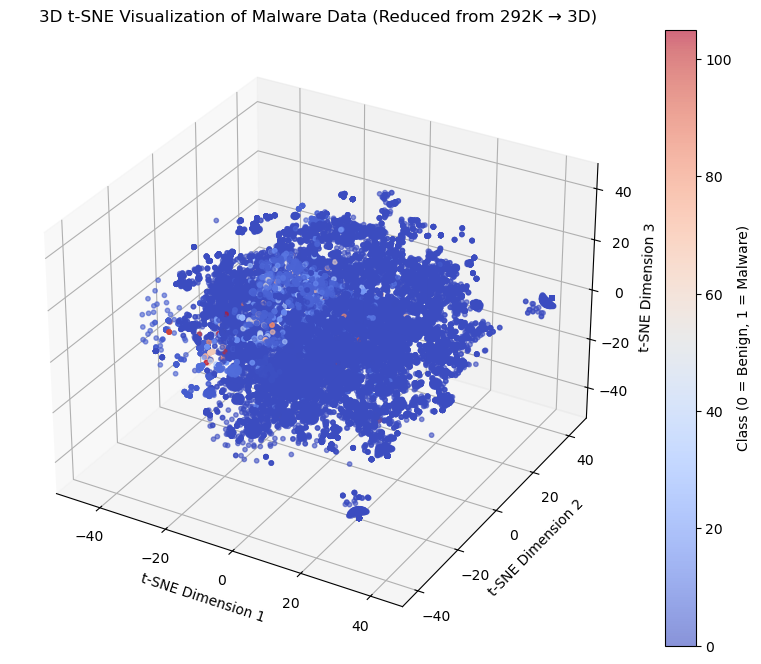

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Step 3: Plot in 3D
print("Plotting t-SNE in 3D...")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 1], X_tsne[:, 2], X_tsne[:, 0], c=y, cmap='coolwarm', alpha=0.6, s=10)
fig.colorbar(scatter, ax=ax, label='Class (0 = Benign, 1 = Malware)')
ax.set_title("3D t-SNE Visualization of Malware Data (Reduced from 292K → 3D)")
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
ax.set_zlabel("t-SNE Dimension 3")
plt.show()